In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
data=pd.read_csv("biofuel-production.csv")

In [3]:
data

,Entity,Code,Year,Biofuels Production - TWh - Total
0,Africa,NaN,1990,0.068617
1,Africa,NaN,1991,0.068617
2,Africa,NaN,1992,0.068805
3,Africa,NaN,1993,0.068617
4,Africa,NaN,1994,0.068617
...,...,...,...,...
1080,World,OWID_WRL,2016,927.775210
1081,World,OWID_WRL,2017,969.005102
1082,World,OWID_WRL,2018,1067.869413
1083,World,OWID_WRL,2019,1110.499302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Entity                             1085 non-null   object 
 1   Code                               775 non-null    object 
 2   Year                               1085 non-null   int64  
 3   Biofuels Production - TWh - Total  1085 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 34.0+ KB


In [5]:
data['Code']=data['Code'].fillna('Unknown')

In [6]:
data.describe()


,Year,Biofuels Production - TWh - Total
count,1085.000000,1085.000000
mean,2005.000000,52.201148
std,8.948397,131.554351
min,1990.000000,0.000000
25%,1997.000000,0.000000
50%,2005.000000,2.952341
75%,2013.000000,29.390696
max,2020.000000,1110.499302


In [7]:
X = data[['Entity', 'Code', 'Year']]
y = data['Biofuels Production - TWh - Total']

In [8]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[['Entity', 'Code']])

In [9]:
X_final = np.hstack((X_encoded, X[['Year']].values))

In [10]:
X_final

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        1.990e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        1.991e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        1.992e+03],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.018e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.019e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.020e+03]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression (SVR)": SVR(),
    "Gradient Boosting Regression": GradientBoostingRegressor(n_estimators=100, random_state=42)
}


In [13]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} Model Evaluation:")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")


Linear Regression Model Evaluation:
Mean Squared Error (MSE): 5450.474747778076
Root Mean Squared Error (RMSE): 73.82733062882659
R^2 Score: 0.5188963294370076

Decision Tree Regression Model Evaluation:
Mean Squared Error (MSE): 91.59963449087222
Root Mean Squared Error (RMSE): 9.5707697961487
R^2 Score: 0.991914663875151

Random Forest Regression Model Evaluation:
Mean Squared Error (MSE): 55.884015911795444
Root Mean Squared Error (RMSE): 7.475561243933156
R^2 Score: 0.9950672177332945

Support Vector Regression (SVR) Model Evaluation:
Mean Squared Error (MSE): 12798.371442633155
Root Mean Squared Error (RMSE): 113.12988748616856
R^2 Score: -0.1296893872941025

Gradient Boosting Regression Model Evaluation:
Mean Squared Error (MSE): 348.64941394740333
Root Mean Squared Error (RMSE): 18.672156114048622
R^2 Score: 0.9692253389747176


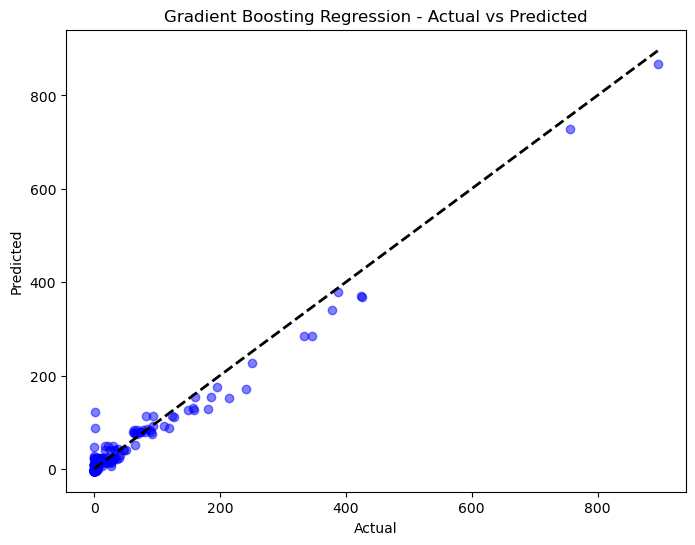

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title(f'{name} - Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

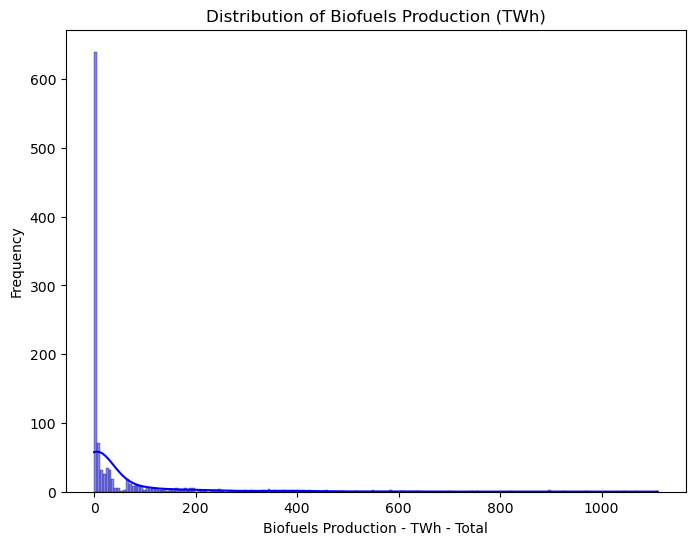

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Biofuels Production - TWh - Total'], kde=True, color='blue')
plt.title('Distribution of Biofuels Production (TWh)')
plt.xlabel('Biofuels Production - TWh - Total')
plt.ylabel('Frequency')
plt.show()

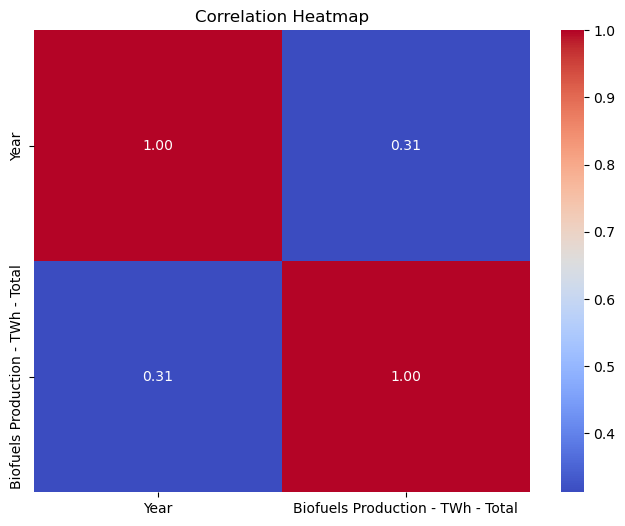

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
df = pd.read_csv("biofuel-production.csv")


In [19]:
df['Code']=df['Code'].fillna('unknown')

In [20]:
X = data[['Entity', 'Code', 'Year']]  
y = data['Biofuels Production - TWh - Total']  

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['Entity', 'Code']),
        ('num', 'passthrough', ['Year'])
    ]
)

In [22]:
models = {
    "Linear Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]),
    "Decision Tree Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', DecisionTreeRegressor(random_state=42))
    ]),
    "Random Forest Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    "Support Vector Regression (SVR)": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', SVR())
    ]),
    "Gradient Boosting Regression": Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', GradientBoostingRegressor(n_estimators=100, random_state=42))
    ])
}


In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:


param_grids = {
    "Linear Regression": {},
    "Decision Tree Regression": {
        'model__max_depth': [3, 5, 7, 10],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 4]
    },
    "Random Forest Regression": {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20, None],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2]
    },
    "Support Vector Regression (SVR)": {
        'model__C': [1, 10, 100],
        'model__gamma': ['scale', 'auto'],
        'model__kernel': ['linear', 'rbf']
    },
    "Gradient Boosting Regression": {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 4, 5]
    }
}

In [25]:
for name, pipeline in models.items():
    print(f"\nHyperparameter Tuning for {name}:")
    param_grid = param_grids.get(name, {})
    if param_grid:
        grid_search = GridSearchCV(pipeline, 
                                   param_grid, 
                                   cv=5, 
                                   scoring='r2',
                                   n_jobs=-1)
        grid_search.fit(X_train, y_train)
        print(f"Best Hyperparameters: {grid_search.best_params_}")
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
    else:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        best_model = pipeline
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R^2 Score: {r2}")


Hyperparameter Tuning for Linear Regression:
Mean Squared Error (MSE): 5450.474747778076
Root Mean Squared Error (RMSE): 73.82733062882659
R^2 Score: 0.5188963294370076

Hyperparameter Tuning for Decision Tree Regression:
Best Hyperparameters: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2}
Mean Squared Error (MSE): 221.20859939949187
Root Mean Squared Error (RMSE): 14.873083049572871
R^2 Score: 0.9804743120450968

Hyperparameter Tuning for Random Forest Regression:
Best Hyperparameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Mean Squared Error (MSE): 56.93266797565095
Root Mean Squared Error (RMSE): 7.545373945382094
R^2 Score: 0.9949746550886791

Hyperparameter Tuning for Support Vector Regression (SVR):
Best Hyperparameters: {'model__C': 100, 'model__gamma': 'scale', 'model__kernel': 'linear'}
Mean Squared Error (MSE): 6869.766443367584
Root Mean Squared Error (RMSE): 

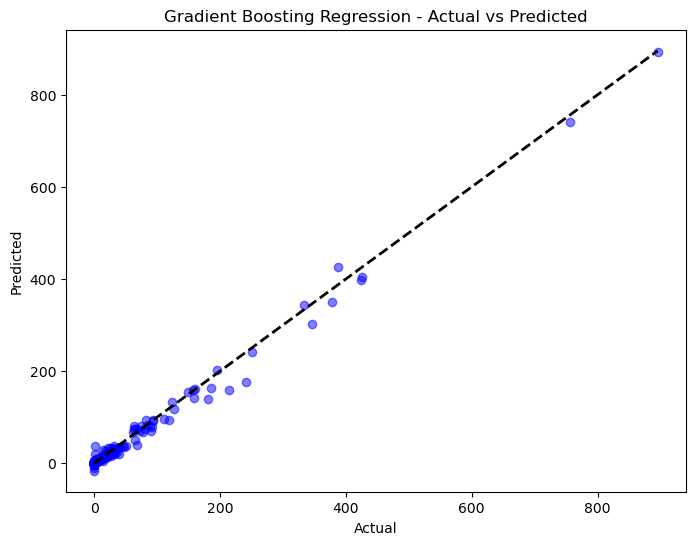

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title(f'{name} - Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

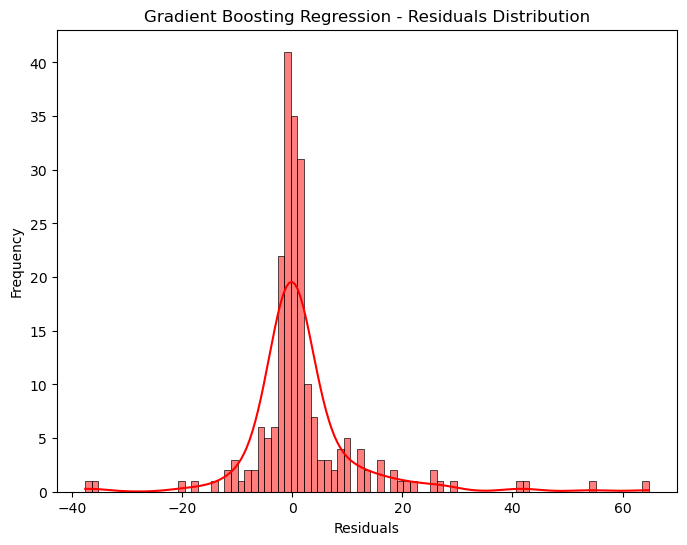

In [27]:
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.histplot(residuals, kde=True, color='red')
    plt.title(f'{name} - Residuals Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_4212\2361925900.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


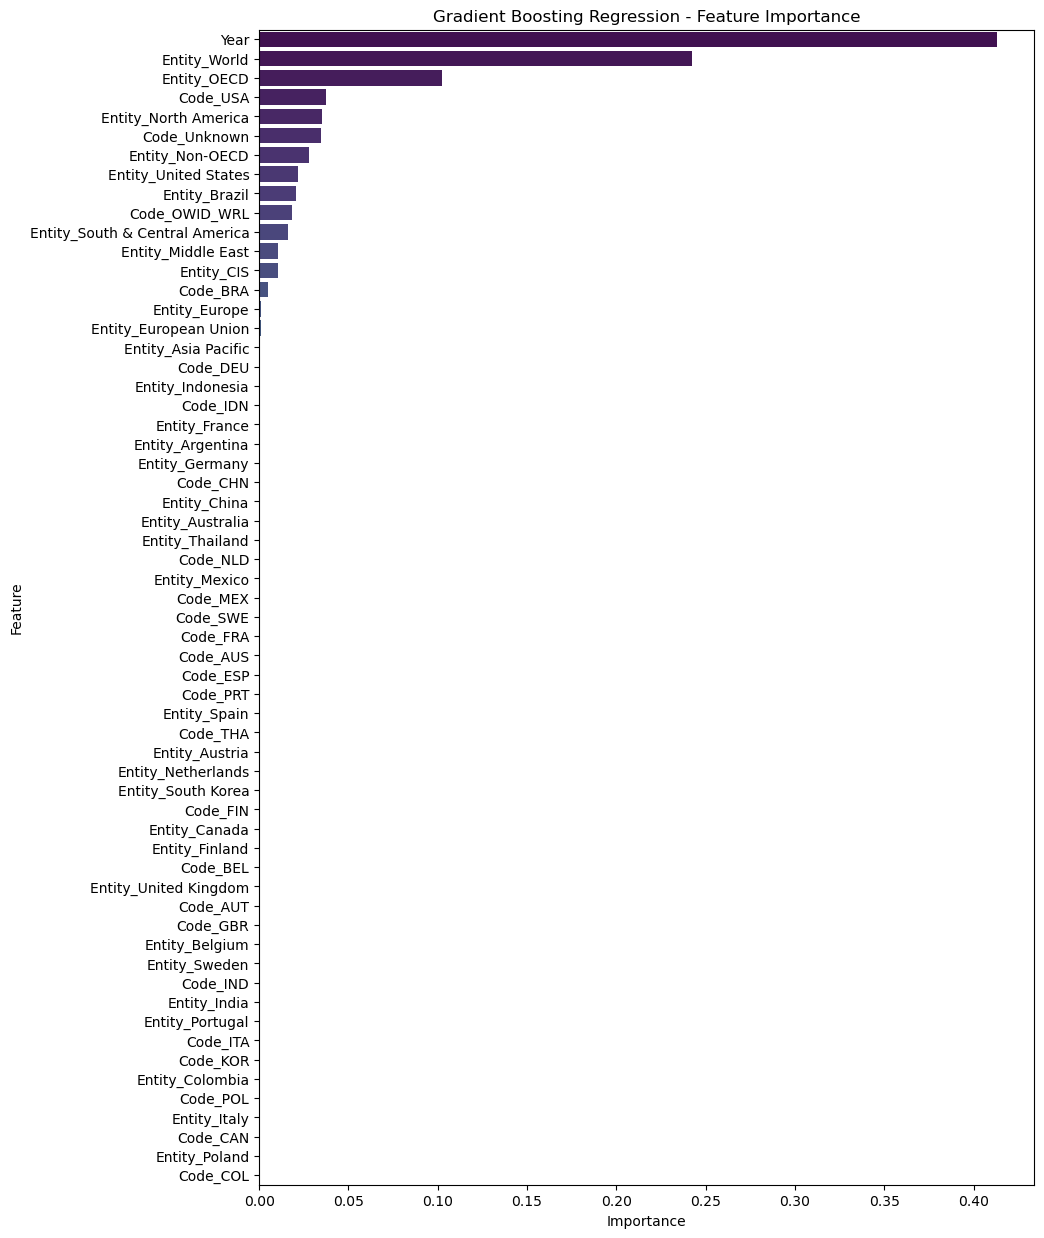

In [28]:
if name in ["Random Forest Regression", "Gradient Boosting Regression"]:
    importances = best_model.named_steps['model'].feature_importances_
    feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(['Entity', 'Code'])
    feature_names = np.append(feature_names, 'Year')
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 15))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(f'{name} - Feature Importance')
    plt.show()

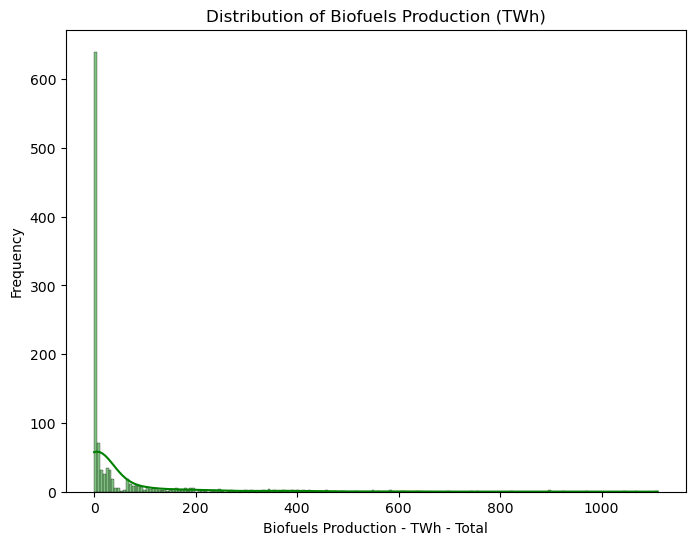

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color='green')
plt.title('Distribution of Biofuels Production (TWh)')
plt.xlabel('Biofuels Production - TWh - Total')
plt.ylabel('Frequency')
plt.show()

In [31]:
pickle.dump(model, open('model.pkl', 'wb'))